<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/data-analysis/MATPLOTLIB_%2B_NUMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [ ]:
addNum = [random.randint(95,100) for a in range(40)]
arrNum = [random.randint(50,60) for a in range(40)]
arrNum2 = [random.randint(30,40) for a in range(40)]
arrNum3 = [random.randint(10,20) for a in range(40)]

xList = [x for x in range(1,41)]

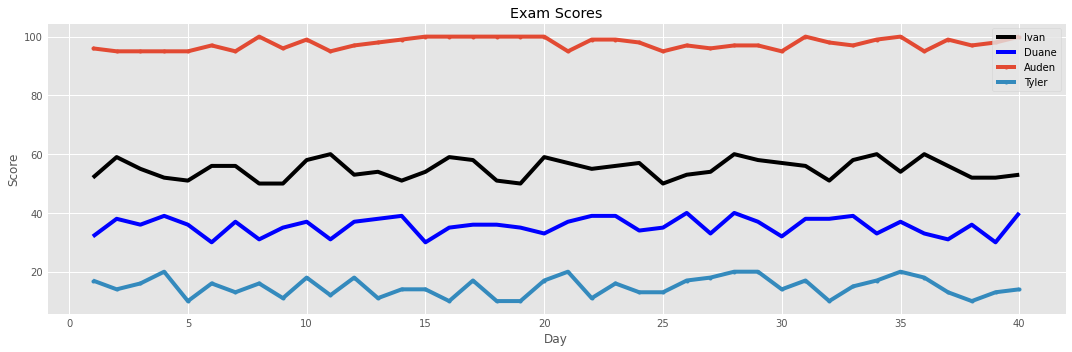

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.plot(xList, arrNum, color='k', label='Ivan')
plt.plot(xList, arrNum2, color='b', label='Duane')
plt.plot(xList, addNum, marker='.', label='Auden')
plt.plot(xList, arrNum3, marker='.', label='Tyler')


plt.xlabel('Day')
plt.ylabel('Score')

plt.title('Exam Scores')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/report.csv')
df.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [ ]:
columnsWithNan = ['population', 'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies', 'months_reported', 'crimes_percapita', 'homicides_percapita', 'rapes_percapita', 'assaults_percapita', 'robberies_percapita']
for c in columnsWithNan:
  df[c].fillna(df[c].median(), inplace=True)

In [ ]:
df.drop(columns=['agency_code'], inplace=True)
df.isnull().sum()

report_year            0
agency_jurisdiction    0
population             0
violent_crimes         0
homicides              0
rapes                  0
assaults               0
robberies              0
months_reported        0
crimes_percapita       0
homicides_percapita    0
rapes_percapita        0
assaults_percapita     0
robberies_percapita    0
dtype: int64

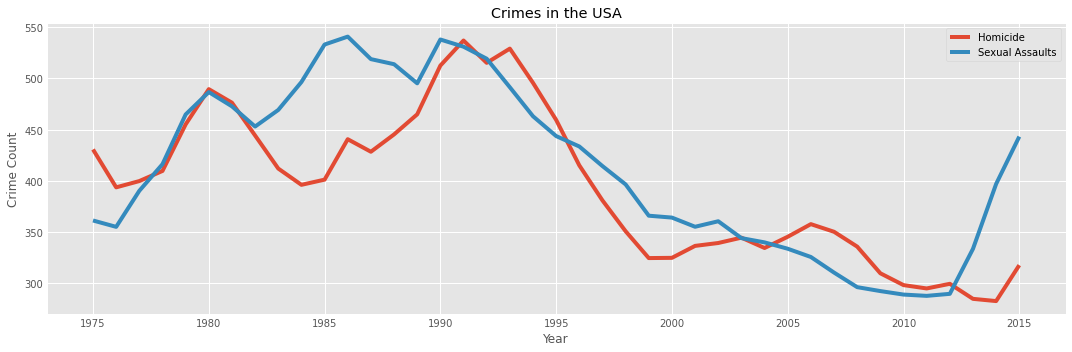

In [ ]:
homi = df['homicides'].to_numpy()
rapes = df['rapes'].to_numpy()
assaults = df['assaults'].to_numpy()
robberies = df['robberies'].to_numpy()
year = df['report_year'].to_numpy()

plt.figure(figsize=(15,5))

sns.lineplot(x=year, y=homi, label='Homicide', ci=None)
sns.lineplot(x=year, y=rapes, label='Sexual Assaults', ci=None)
# sns.lineplot(x=year, y=assaults, label='Assaults', ci=None)
# sns.lineplot(x=year, y=robberies, label='Robberies', ci=None)


plt.xlabel('Year')
plt.ylabel('Crime Count')

plt.title('Crimes in the USA')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()






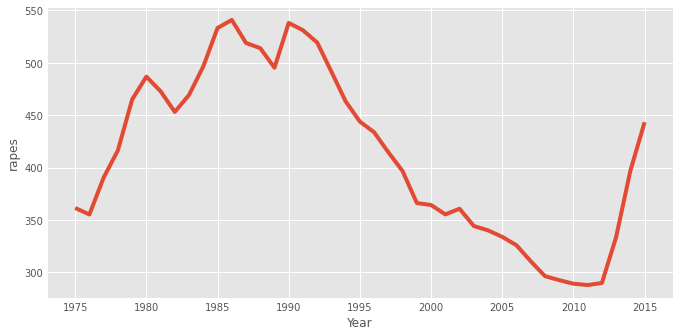

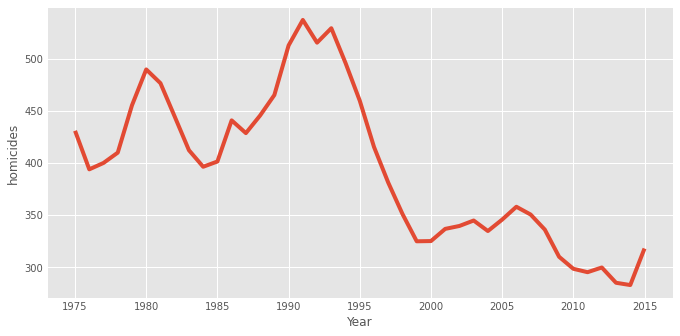

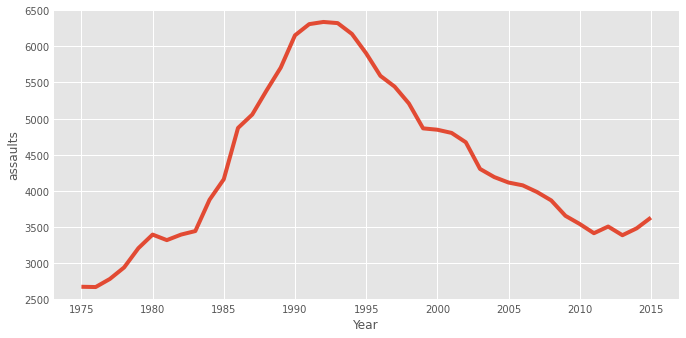

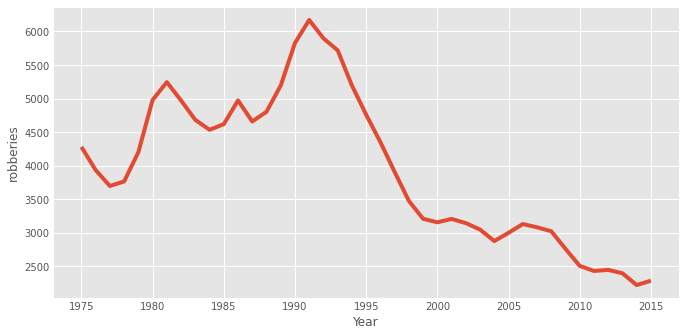

In [ ]:
crimes = ['rapes', 'homicides', 'assaults', 'robberies']
for c in crimes:
  plt.figure(figsize=(10,5))
  axs= df.groupby('report_year')[c].mean().plot()
  axs.set_xlabel("Year")
  axs.set_ylabel(c)

In [ ]:
df['State'] = df['agency_jurisdiction'].str.split().str[1]
df['State'] = df['State'].str.replace(',', '') 
df.head()

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,State
0,1975,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,NM
1,1975,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,TX
2,1975,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,GA
3,1975,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,CO
4,1975,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,TX


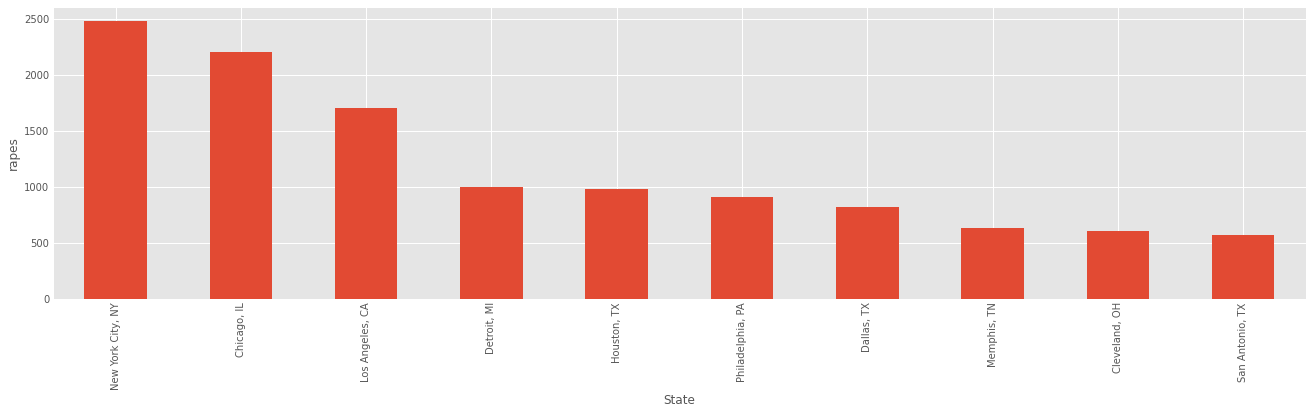

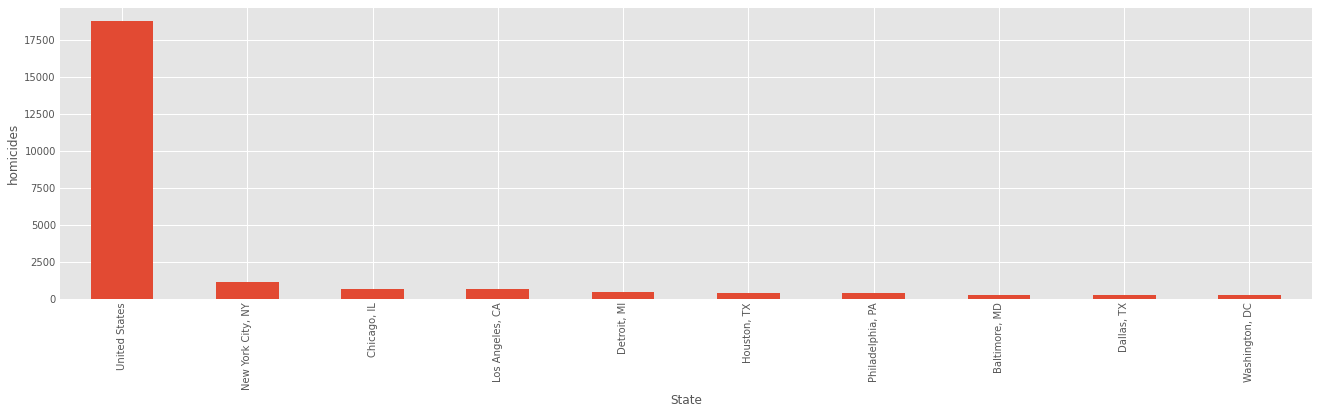

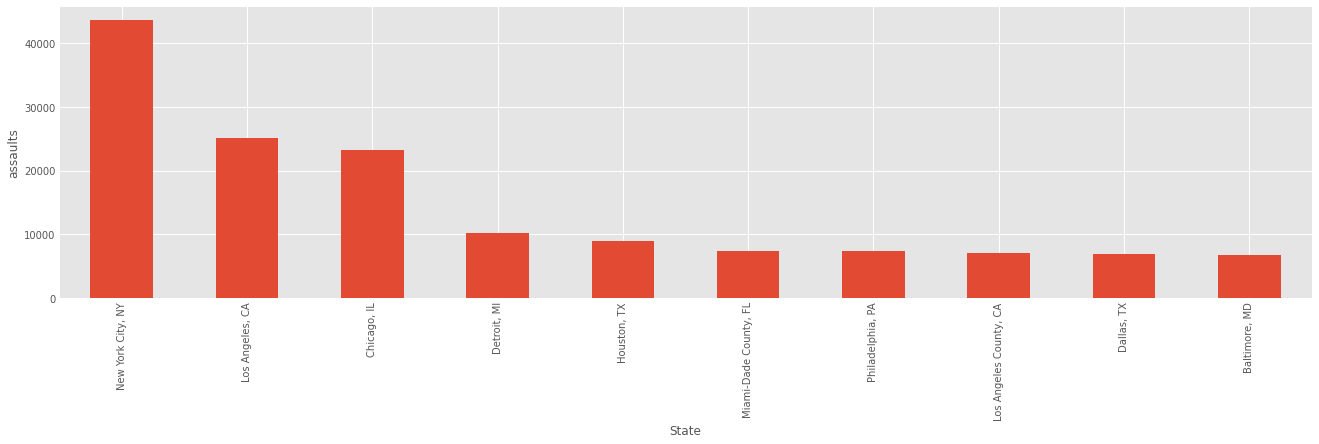

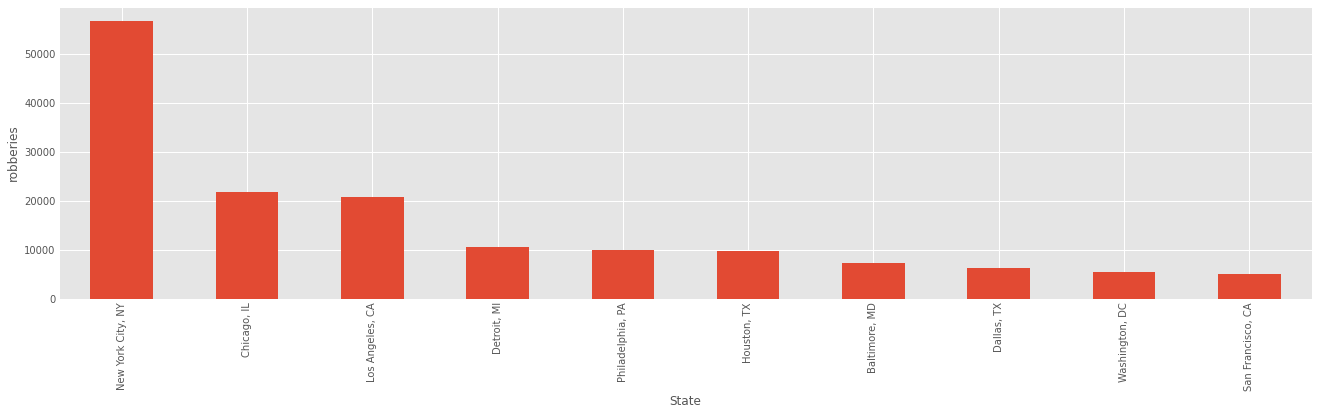

In [ ]:
crimes = ['rapes', 'homicides', 'assaults', 'robberies']
for c in crimes:
  plt.figure(figsize=(20,5))
  axs= df.groupby('agency_jurisdiction')[c].mean().nlargest(10).plot.bar()
  axs.set_xlabel("State")
  axs.set_ylabel(c)